In [ ]:
# Test_241128

In [86]:
### SST (KHOA) 통계처리
import netCDF4 as nc 
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

# 데이터 경로 설정
data = nc.Dataset('F:\\BigDataProcessing\\KHOA_SST_L4_Z003_D01_WGS001K_U20230719.nc')

# 변수 추출
time = data['time'][:].data
lon = data['lon'][:].data
lat = data['lat'][:].data
sst = data['sst'][:].data

# 데이터 필터링
sst_tmp = sst[sst > -999]
sst_min = np.nanmin(sst_tmp)
sst_max = np.nanmax(sst_tmp)

# 'time' 데이터 변환 (시작시간 + 경과시간)
time_since_str = data['time'].units     
time_since_str = time_since_str[12:31]  
time_str = dt.datetime.strptime(time_since_str, '%Y-%m-%d %H:%M:%S') + dt.timedelta(hours=int(time[0]))

# 경위도 좌표를 격자 형태로 변환
meshlon, meshlat = np.meshgrid(lon, lat)

# NetCDF 파일의 data dimension 변경
d, r, c = sst.shape
sst = np.squeeze(sst)

# 관심 영역(ROI) 설정
# bbox = [126, 132, 33.5, 37.5]  # [min_lon, max_lon, min_lat, max_lat]
bbox = [129, 130, 35.3, 36.3]  # 동해남부해역
# bbox = [129.2, 129.5, 35.1, 35.4]  # ????

cond = (bbox[0] < meshlon) & (meshlon < bbox[1]) & (bbox[2] < meshlat) & (meshlat < bbox[3])
sst[~cond] = np.nan

# 관심 영역 이외의 데이터 삭제
cond_x = np.sum(cond, axis=0) != 0
cond_y = np.sum(cond, axis=1) != 0
rev_r, rev_c = np.sum(cond_x), np.sum(cond_y)

rev_sst = sst[~np.isnan(sst)].reshape(rev_r, rev_c)
rev_meshlon = meshlon[~np.isnan(sst)].reshape(rev_r, rev_c)
rev_meshlat = meshlat[~np.isnan(sst)].reshape(rev_r, rev_c)

In [87]:
# -999 값을 NaN으로 변환
sst[sst <= -999] = np.nan

# 관심 영역(ROI) 데이터에서 NaN 제외
rev_sst = sst[cond]
rev_sst_flat = rev_sst[~np.isnan(rev_sst)]

# 통계 계산
from scipy.stats import describe

stats = describe(rev_sst_flat, nan_policy='omit')
print(f"Count: {stats.nobs}")
print(f"Min: {stats.minmax[0]:.2f}, Max: {stats.minmax[1]:.2f}")
print(f"Mean: {stats.mean:.2f}, Variance: {stats.variance:.2f}")
print(f"Skewness: {stats.skewness:.2f}, Kurtosis: {stats.kurtosis:.2f}")


Count: 5667
Min: 17.51, Max: 24.40
Mean: 22.10, Variance: 0.98
Skewness: -0.90, Kurtosis: 1.62


In [88]:
print(f"Original SST shape: {sst.shape}")
print(f"Valid SST data: {np.sum(~np.isnan(sst))}")
print(f"rev_sst shape: {rev_sst.shape}")
print(f"Valid data in ROI: {np.sum(~np.isnan(rev_sst))}")


Original SST shape: (3301, 3301)
Valid SST data: 5667
rev_sst shape: (9801,)
Valid data in ROI: 5667


그림이 'SST_Distribution_2023-07-19.png'로 저장되었습니다.


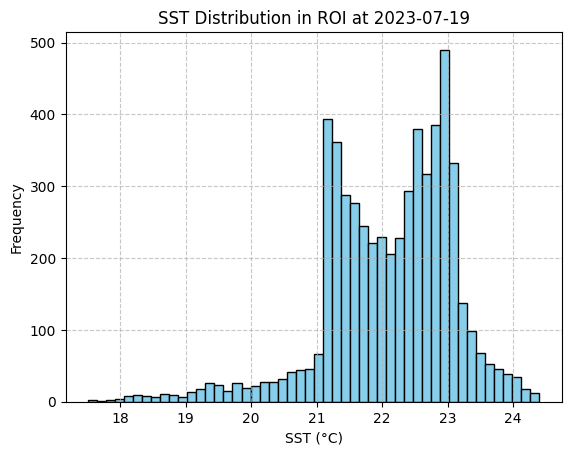

In [89]:
import matplotlib.pyplot as plt

# SST 데이터 분포 시각화
plt.hist(rev_sst_flat, bins=50, color='skyblue', edgecolor='black')
plt.title(f'SST Distribution in ROI at {time_str:%Y-%m-%d}')
plt.xlabel('SST (°C)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)

# 그림 저장
output_file = f'SST_Distribution_{time_str:%Y-%m-%d}.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')
print(f"그림이 '{output_file}'로 저장되었습니다.")

plt.show()
